In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import glob
import re
import requests
from matplotlib.patches import Rectangle
from datetime import datetime
sns.set()

gather all data sets.

introduce new rolling average features. (want to capture time dependence)

Ideas for the inclusion or creation of new columns.

Moving averages
fourier
signal
flags for lots of different things

humans view, interpret and forecast things in a way which are not available to robots. 
data driven, time dependent manner of modeling. Really trying to encapsulate the time dependence. 

data_source	name of upstream data source 
(e.g., fb-survey, google-survey, ght, quidel, doctor-visits)	string

signal	name of signal derived from upstream data (see notes below)	string

time_type	temporal resolution of the signal (e.g., day, week)	string

geo_type	spatial resolution of the signal (e.g., county, hrr, msa, dma, state)	string

time_values	time unit (e.g., date) over which underlying events happened	list of time values (e.g., 20200401)

geo_value	unique code for each location, depending on geo_type (county -> FIPS 6-4 code, HRR -> HRR number, MSA -> CBSA code,
DMA -> DMA code, state -> two-letter state code), or * for all	string

As of this writing, data sources have the following signals:

fb-survey signal values include raw_cli, raw_ili, raw_wcli, raw_wili, and also four additional named with raw_* replaced by smoothed_* (e.g. smoothed_cli, etc).
google-survey signal values include raw_cli and smoothed_cli.
ght signal values include raw_search and smoothed_search.
quidel signal values include smoothed_pct_negative and smoothed_tests_per_device.
doctor-visits signal values include smoothed_cli.

Delphi API data :
doctor visits : 20200201-20200429 (as of 20200503)


In [ ]:
# rng = pd.date_range(pd.Timestamp("2018-03-10 09:00"),
#                     periods=3, freq='s')
# rng.strftime('%B %d, %Y, %r')
# Index(['March 10, 2018, 09:00:00 AM', 'March 10, 2018, 09:00:01 AM',
#        'March 10, 2018, 09:00:02 AM'],
#       dtype='object')

In [256]:
# pd.date_range(end = datetime.today(), periods = 100).to_pydatetime().tolist()

date_range_2020 = pd.date_range(start="20200101",end=''.join(str(datetime.now().date()).split('-'))).strftime('%Y%m%d')
date_range_2020

Index(['20200101', '20200102', '20200103', '20200104', '20200105', '20200106',
       '20200107', '20200108', '20200109', '20200110',
       ...
       '20200424', '20200425', '20200426', '20200427', '20200428', '20200429',
       '20200430', '20200501', '20200502', '20200503'],
      dtype='object', length=124)

In [274]:
def pull_delphi_data(data_source=['fb-survey', 'google-survey', 'ght', 'quidel', 'quidelneg', 'doctor-visits'], 
                     daterange=pd.date_range(start="20200101",
                                             end=''.join(str(datetime.now().date()).split('-'))).strftime('%Y%m%d'),
                     **kwargs):
    """ Pull data from https://cmu-delphi.github.io/delphi-epidata/api/
        https://cmu-delphi.github.io/delphi-epidata/api/covidcast.html
    
    
    
    """
    
    for data in data_source:
        signal_dict = {'fb-survey':'smoothed_cli',
                       'google-survey':'smoothed_cli'
                       'ght':'smoothed_search',
                       'quidel':'smoothed_tests_per_device',
                       'quidelneg':'smoothed_pct_negative',
                       'doctor-visits':'smoothed_cli'}
        signal = signal_dict[data]
        if data=='quidelneg':
            #change the proxy for the quidel signal
            data = 'quidel':
        for days in daterange:
            resp = requests.get('https://delphi.cmu.edu/epidata/api.php?source=covidcast&data_source=doctor-visits&signal=smoothed_cli&time_type=day&geo_type=county&geo_value=*&time_values='+days)
            day_data = resp.json().get('epidata', None)
            if day_data is None:
                pass
            else:
                var_number += pd.json_normalize(day_data).size
                print(pd.json_normalize(day_data).shape)    


In [270]:
var_number = 0 
for days in date_range_2020:
#     days='20200302'
    resp = requests.get('https://delphi.cmu.edu/epidata/api.php?source=covidcast&data_source=doctor-visits&signal=smoothed_cli&time_type=day&geo_type=county&geo_value=*&time_values='+days)
    day_data = resp.json().get('epidata', None)
    if day_data is None:
        pass
    else:
        var_number += pd.json_normalize(day_data).size
        print(pd.json_normalize(day_data).shape)

(1889, 6)
(1882, 6)
(1870, 6)
(1896, 6)
(1972, 6)
(2029, 6)
(2013, 6)
(1945, 6)
(1940, 6)
(2027, 6)
(2009, 6)
(1995, 6)
(1985, 6)
(1965, 6)
(1892, 6)
(1892, 6)
(1980, 6)
(1982, 6)
(1976, 6)
(1972, 6)
(1974, 6)
(1921, 6)
(1921, 6)
(2012, 6)
(2016, 6)
(2010, 6)
(2014, 6)
(2001, 6)
(1938, 6)
(1936, 6)
(2024, 6)
(2018, 6)
(2003, 6)
(1991, 6)
(1967, 6)
(1908, 6)
(1891, 6)
(1962, 6)


KeyboardInterrupt: 

In [263]:
resp.json().get('epidata', 'fail')

[{'geo_value': '01000',
  'time_value': 20200302,
  'direction': 0,
  'value': 0,
  'stderr': None,
  'sample_size': None},
 {'geo_value': '01001',
  'time_value': 20200302,
  'direction': 0,
  'value': 0.152702,
  'stderr': 0.546355,
  'sample_size': None},
 {'geo_value': '01003',
  'time_value': 20200302,
  'direction': 0,
  'value': 0,
  'stderr': None,
  'sample_size': None},
 {'geo_value': '01005',
  'time_value': 20200302,
  'direction': 0,
  'value': 0.369912,
  'stderr': 1.031149,
  'sample_size': None},
 {'geo_value': '01007',
  'time_value': 20200302,
  'direction': 0,
  'value': 0,
  'stderr': None,
  'sample_size': None},
 {'geo_value': '01009',
  'time_value': 20200302,
  'direction': 0,
  'value': 0,
  'stderr': None,
  'sample_size': None},
 {'geo_value': '01011',
  'time_value': 20200302,
  'direction': 0,
  'value': 0,
  'stderr': None,
  'sample_size': None},
 {'geo_value': '01013',
  'time_value': 20200302,
  'direction': 0,
  'value': 0,
  'stderr': None,
  'sample_

In [ ]:
resp = requests.get('https://delphi.cmu.edu/epidata/api.php?source=covidcast&data_source=doctor-visits&signal=smoothed_cli&time_type=day&geo_type=county&geo_value=*&time_values='+doctor_visit_time_range)
pd.json_normalize(resp.json())

In [239]:
doctor_visit_time_range = '20200201-'+''.join(str(datetime.now().date()).split('-'))
resp = requests.get('https://delphi.cmu.edu/epidata/api.php?source=covidcast&data_source=doctor-visits&signal=smoothed_cli&time_type=day&geo_type=county&geo_value=*&time_values='+doctor_visit_time_range)
pd.json_normalize(resp.json())

,result,epidata,message
0,2,"[{'geo_value': '01000', 'time_value': 20200201...","too many results, data truncated"


Response data automated

In [247]:
pd.json_normalize(resp.json()['epidata']).time_value

0       20200201
1       20200201
2       20200201
3       20200201
4       20200201
          ...   
3645    20200202
3646    20200202
3647    20200202
3648    20200202
3649    20200202
Name: time_value, Length: 3650, dtype: int64

In [ ]:
url_to_present_date = 'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/date-range/2020-01-02/' \
                        + str(datetime.now().date())
response = requests.get(url_to_present_date)
response_json = response.json()
response_json_nested_dict = response_json['data']

In [2]:
def tsplot(data, roll_width, **kw):
    rollmean = datatmp.rolling(roll_width).mean().fillna(method='backfill').values.ravel()
    rollstd  = datatmp.rolling(roll_width).std().fillna(method='backfill').values.ravel()
    cis = (rollmean - rollstd, rollmean + rollstd)
    fig, ax = plt.subplots()
    ax.fill_between(range(len(datatmp)), cis[0], cis[1], alpha=0.5)
    ax.plot(range(len(datatmp)), rollmean, color='k', **kw)
    return ax

function ```append_rolling_values``` is not working. Need to compute rolling averages for each
countries time series' individually but want to store them in the multi index DataFrame. 

'20200503'

In [179]:
def append_rolling_values(data, features, roll_widths):
    # only do the averaging over one country at a time, but store in single array so that
    # we can assign it to j
    data_to_roll = data.loc[:, features].copy()
    for window in roll_widths:
        # order the dataframe so date is index, backfill in the first roll_width values 
        rollmean = pd.DataFrame(data_to_roll.reset_index(level=0).groupby(by='Country').rolling(roll_width).mean().fillna(method='backfill'))
        rollstd = pd.DataFrame(data_to_roll.reset_index(level=0).groupby(by='Country').rolling(roll_width).std().fillna(method='backfill'))    
        new_feature_df = pd.concat((rollmean, rollstd), axis=1)
        indexlist = (data_to_roll.columns+'_rolling_mean_'+str(window)).tolist()
        indexlist.extend((data_to_roll.columns+'_rolling_std_'+str(window)).tolist())
        new_feature_df.columns = indexlist
        extended_data = pd.concat((data, new_feature_df), axis=1)
    return extended_data  

In [180]:
features = ['total_cases_interpolated','tests_cumulative_interpolated']
roll_width = 14
window=14

In [184]:
append_rolling_values(data, features, [14]).iloc[:,-5:]

cumulative_normalized_case_test_ratio  \
Country     Date                                                
Afghanistan 2019-12-31                               0.011905   
            2020-01-01                               0.023810   
            2020-01-02                               0.035714   
            2020-01-03                               0.047619   
            2020-01-04                               0.059524   
...                                                       ...   
Zimbabwe    2020-04-16                             837.787252   
            2020-04-17                             837.796879   
            2020-04-18                             837.806506   
            2020-04-19                             837.816534   
            2020-04-20                             837.826562   

                        total_cases_interpolated_rolling_mean_14  \
Country     Date                                                   
Afghanistan 2019-12-31                                  1.000000   
            2020-01-01                                  1.000000   
            2020-01-02                                  1.000000   
            2020-01-03                                  1.000000   
            2020-01-04                                  1.000000   
...                                                          ...   
Zimbabwe    2020-04-16                                 12.285714   
            2020-04-17                                 13.428571   
            2020-04-18                                 14.500000   
            2020-04-19                                 15.642857   
            2020-04-20                                 16.785714   

                        tests_cumulative_interpolated_rolling_mean_14  \
Country     Date                                                        
Afghanistan 2019-12-31                                      84.000000   
            2020-01-01                                      84.000000   
            2020-01-02                                      84.000000   
            2020-01-03                                      84.000000   
            2020-01-04                                      84.000000   
...                                                               ...   
Zimbabwe    2020-04-16                                     521.428571   
            2020-04-17                                     676.000000   
            2020-04-18                                     829.142857   
            2020-04-19                                     982.285714   
            2020-04-20                                    1133.857143   

                        total_cases_interpolated_rolling_std_14  \
Country     Date                                                  
Afghanistan 2019-12-31                                 0.000000   
            2020-01-01                                 0.000000   
            2020-01-02                                 0.000000   
            2020-01-03                                 0.000000   
            2020-01-04                                 0.000000   
...                                                         ...   
Zimbabwe    2020-04-16                                 4.268463   
            2020-04-17                                 5.094707   
            2020-04-18                                 5.639831   
            2020-04-19                                 6.046069   
            2020-04-20                                 6.203951   

                        tests_cumulative_interpolated_rolling_std_14  
Country     Date                                                      
Afghanistan 2019-12-31                                      0.000000  
            2020-01-01                                      0.000000  
            2020-01-02                                      0.000000  
            2020-01-03                                      0.000000  
            2020-01-04                       

In [144]:
data.loc[:, features].reset_index(level=0).groupby(by='Country').rolling(roll_width).mean().fillna(method='backfill')

total_cases_interpolated  \
Country     Date                                   
Afghanistan 2019-12-31                  1.000000   
            2020-01-01                  1.000000   
            2020-01-02                  1.000000   
            2020-01-03                  1.000000   
            2020-01-04                  1.000000   
...                                          ...   
Zimbabwe    2020-04-16                 12.285714   
            2020-04-17                 13.428571   
            2020-04-18                 14.500000   
            2020-04-19                 15.642857   
            2020-04-20                 16.785714   

                        tests_cumulative_interpolated  
Country     Date                                       
Afghanistan 2019-12-31                      84.000000  
            2020-01-01                      84.000000  
            2020-01-02                      84.000000  
            2020-01-03                      84.000000  
            2020-01-04                      84.000000  
...                                               ...  
Zimbabwe    2020-04-16                     521.428571  
            2020-04-17                     676.000000  
            2020-04-18                     829.142857  
            2020-04-19                     982.285714  
            2020-04-20                    1133.857143  

[12208 rows x 2 columns]

In [4]:
url_to_present_date = 'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/date-range/2020-01-02/' \
                        + str(datetime.now().date())
response = requests.get(url_to_present_date)
response_json = response.json()
response_json_nested_dict = response_json['data']

In [5]:
pd.DataFrame.from_dict({(i,j): response_json_nested_dict[i][j] 
                           for i in response_json_nested_dict.keys() 
                           for j in response_json_nested_dict[i].keys()},
                       orient='index')

date_value country_code  confirmed  deaths  stringency_actual  \
2020-01-02 AFG  2020-01-02          AFG          0       0                0.0   
           ARE  2020-01-02          ARE          0       0                0.0   
           AUS  2020-01-02          AUS          0       0                0.0   
           AUT  2020-01-02          AUT          0       0                0.0   
           AZE  2020-01-02          AZE          0       0                0.0   
...                    ...          ...        ...     ...                ...   
2020-05-03 ZWE  2020-05-03          ZWE         34       4                NaN   
           VNM  2020-05-03          VNM        270       0                NaN   
           VEN  2020-05-03          VEN        345      10                NaN   
           ZAF  2020-05-03          ZAF       6336     123                NaN   
           TUN  2020-05-03          TUN       1009      42                NaN   

                stringency  stringency_legacy  stringency_legacy_disp  
2020-01-02 AFG        0.00                0.0                    0.00  
           ARE        0.00                0.0                    0.00  
           AUS        0.00                0.0                    0.00  
           AUT        0.00                0.0                    0.00  
           AZE        0.00                0.0                    0.00  
...                    ...                ...                     ...  
2020-05-03 ZWE       95.37                NaN                   97.14  
           VNM       78.31                NaN                   87.14  
           VEN       53.57                NaN                   65.71  
           ZAF       91.40                NaN                   92.38  
           TUN       97.35                NaN                   97.14  

[11566 rows x 8 columns]

In [6]:
def multi_index_slice_to_average_rate(x):
    sliced_values = data.loc[x, :]
    sliced_values_of_interest = sliced_values.loc[:, 'cases_per_1M_people_per_100k_tests']

    # x is a tuple of the form ('country', slice(A,B))
    if len(sliced_values_of_interest) == 0:
        return np.nan
    if x[1].start is None:
        before_df = sliced_values_of_interest.iloc[:-1]
        cutoff = sliced_values_of_interest.iloc[-1]
        avg_case_rate = cutoff-before_df.mean()
    else:
        after_df = sliced_values_of_interest.iloc[1:]
        cutoff = sliced_values_of_interest.iloc[0]
        avg_case_rate = after_df.mean()-cutoff
     
    return avg_case_rate

In [7]:
def multiindex_response_date_to_average_rates(x):
    country = x[0]
    date = x[1]
    before_slice = pd.IndexSlice[date-pd.Timedelta(days=14):date-pd.Timedelta(days=1)]
    after_slice =  pd.IndexSlice[date+pd.Timedelta(days=1):date+pd.Timedelta(days=14)]
    cutoff = data.loc[(country, date), 'cases_per_1M_people']
    before_df = data.loc[(country, before_slice), 'cases_per_1M_people']
    after_df = data.loc[(country, after_slice), 'cases_per_1M_people']
    # If windows are the same width, do not need 1/dT factor.
    avg_rate_before = np.log(cutoff/before_df.mean())
    avg_rate_after = np.log(after_df.mean()/cutoff)

    return avg_rate_after - avg_rate_before

Three datasets were used in the test of the effects of country and government mandates. These three datasets included
data on the dates of different quarantine measures per country \cite{govtresponse},  the time series data for the case numbers \cite{owid} and the time series data on the number of tests \cite{find}. These datasets are quite inconsistent due to differences in reaction to the pandemic and the inconsistency of reporting. This manifests as irregular time-series, in terms of the dates on which they are defined, as well as missing values.
Because of this, a number of actions which may or may not be heavy handed needed to be employed.
These actions accounted for the following: differences in time series ranges, missing values, quarantine measures which occur before the first recorded case in a country, dissimilar quarantine measures taken and differences in the countries whose data was recorded.
To make the data uniform, the time series were normalized to be from December 31st 2019 to April 20th, 2020. The end date was simply because one of the data sets has not been updated in the past week. The original missing values and those created by this normalization were handled by using linear interpolation on the interior of the time series and linear extrapolation for the beginning of the time series. This is only applied at the very beginning of each countries time series (if values are missing) typically when the cases number is very small or even equal to 1. Therefore, I believe this action is justified by using linear expansion of exponential growth. After the time series were made uniform, the specific government responses to investigate
were chosen by how widespread their adoption was. The countries were determined by taking the intersection of all countries present in the three data sets. 

To do list:

Filter government response data to find when each measure was enacted for each country.
Get population and testing data for weights
Calculate average growth rates before and after each government response.
This is done by calculating the rates using three data points for each quarantine measure.
The date of first case (subscript $i$), the date of the mandate (subscript $m$), 
and the most recent date or date that the response ended (subscript $f$).
On these two different intervals, calculate the rates before and after which are given by
    
\begin{align}
r_{\text{before}} &= \frac{1}{\Delta t_{mi}}\log(\frac{\phi_m}{\phi_i}) \\
r_{\text{after}} &= \frac{1}{\Delta t_{fm}}\log(\frac{\phi_f}{\phi_m})\,,
\end{align}

where $\phi_j$ is the number of cases per population per tests on a given day, $t = t_j$ 

4. TWO_WAY ANOVA where countries are FACTOR A, response type is FACTOR B and BEFORE AFTER are the N's.

To perform these calculations, need the dates which define the before and after intervals (unique to each country
and response type pair, from https://www.bsg.ox.ac.uk/research/research-projects/coronavirus-government-response-tracker) and need the cases per population per tests. The cases per population is
given in one of the data sets (original testing data, has too many missing values) https://ourworldindata.org/covid-testing . The (more reliable) number of tests is given in the dataset acquired at https://finddx.shinyapps.io/FIND_Cov_19_Tracker/

The property that makes this process very tricky is that all three datasets have variable time series: that is, they vary between datasets, between countries and even between the dates themselves. What I mean by the last part is that sometimes accurate testing numbers were not recorded and so there are either missing values or horizontal testing curves for whatever period of time. My choice for how to handle this difficulty is to use pandas DataFrames, specifically which a multi level index where the levels correspond to the countries and then the dates of the time series. 

Import the .csv file that contains information on government responses and action events.


Two-way ANOVA: Factor A will be quarantine type? Factor B is Country? Only count countries where
quarantine has been active for 2 weeks consectutively. The trials will be the time series. (weighted by population, and number of tests).

Take a subset of data which has implemented all quarantine measures that will be tested. 
The quantifiable measure will be 


OK: averaging over the time series is dubious because of confounding factors. 

Description of raw data

Three datasets were used in the test of the effects of country and government mandates. These three datasets included
data on [] the dates of different quarantine measures per country, [] the time series data for the case numbers and []
the time series data on the number of tests. These datasets are quite inconsistent due to differences in reaction to the pandemic and the inconsistency of reporting. This manifests as irregular time-series, in terms of the dates on which they are defined, as well as missing values. 

Because of this, a number of actions which may be heavy handed needed to be employed.  
These accounted for the following: differences in time series ranges, missing values, quarantine measures which occur before the first recorded case in a country, dissimilar quarantine measures and country data. 
I elected to attempt to make the data as uniform as possible; that is, by using interpolation
for missing values on the interior of the time series and linear extrapolation for the beginning of the time series. The rationale for using a linear extrapolation procedure is thus: I am not extrapolating the "true" number of COVID-19 cases, only
the ones confirmed by testing. In other words I think that this is amenable because of the deployment of testing; the true number of cases may be growing exponentially but I am assuming that the growth in confirmed cases is small at the very onset of the pandemic. 

0. determine which government responses to use, based on how widespread their adoption was. 
['School closing',
 'Workplace closing',
 'Cancel public events',
 'Restrictions on internal movement',
 'International travel controls']

1. Take the intersection of all datasets countries

2. Make the time series uniform

3. Incorporate # tests and population.

4. Decide on how to average, use the response dates. 

Because the data cleaning and wrangling took forever I have no time to consider other methods, even though

In [8]:
response_df = pd.read_csv('./OxCGRT_Download_250420_012832_Full.csv')
response_df.tail()

,CountryName,CountryCode,Date,S1_School closing,S1_IsGeneral,S1_Notes,S2_Workplace closing,S2_IsGeneral,S2_Notes,S3_Cancel public events,...,S11_Notes,S12_Testing framework,S12_Notes,S13_Contact tracing,S13_Notes,ConfirmedCases,ConfirmedDeaths,StringencyIndex,StringencyIndexForDisplay,Unnamed: 39
17277,Kosovo,RKS,20200419,2.0,1.0,NaN,2.0,0.0,NaN,2.0,...,NaN,1.0,NaN,1.0,NaN,510.0,12.0,90.48,90.48,\t
17278,Kosovo,RKS,20200420,2.0,1.0,NaN,2.0,0.0,NaN,2.0,...,NaN,1.0,NaN,1.0,NaN,510.0,12.0,90.48,90.48,\t
17279,Kosovo,RKS,20200421,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,510.0,12.0,NaN,90.48,\t
17280,Kosovo,RKS,20200422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,510.0,12.0,NaN,90.48,\t
17281,Kosovo,RKS,20200423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,510.0,12.0,NaN,90.48,\t


In [9]:
# keys = response_df.loc[:, ['CountryName','CountryCode']].drop_duplicates().reset_index(drop=True).values[:, 1].tolist()
# values = response_df.loc[:, ['CountryName','CountryCode']].drop_duplicates().reset_index(drop=True).values[:, 0].tolist()

# countries_code_to_name = dict(zip(keys, values))

Slice out all "notes" and targeted vs. general response columns. This currently goes beyond what I want to do. Also
merge day, month, year data into single date timestamp

In [10]:
response_df_edit = response_df.copy()
for x in response_df.columns:
    if (x.count('Notes')>0) | (x.count('IsGeneral')>0):
        response_df_edit.drop(columns=x, inplace=True)
        
response_df_edit.drop(columns='Unnamed: 39', inplace=True)
response_df_edit.loc[:, 'Date'] = pd.to_datetime(response_df_edit.Date, format='%Y%m%d', errors='coerce')

In [11]:
group_by_country = response_df_edit.groupby(by=['CountryName','Date']).sum()

In [12]:
group_by_country.columns = ['_'.join(y.split(' ')) for y in [x.split('_')[-1] for x in group_by_country.columns.tolist()]]
group_by_country.head()

School_closing  Workplace_closing  \
CountryName Date                                            
Afghanistan 2020-01-01             0.0                0.0   
            2020-01-02             0.0                0.0   
            2020-01-03             0.0                0.0   
            2020-01-04             0.0                0.0   
            2020-01-05             0.0                0.0   

                        Cancel_public_events  Close_public_transport  \
CountryName Date                                                       
Afghanistan 2020-01-01                   0.0                     0.0   
            2020-01-02                   0.0                     0.0   
            2020-01-03                   0.0                     0.0   
            2020-01-04                   0.0                     0.0   
            2020-01-05                   0.0                     0.0   

                        Public_information_campaigns  \
CountryName Date                                       
Afghanistan 2020-01-01                           0.0   
            2020-01-02                           0.0   
            2020-01-03                           0.0   
            2020-01-04                           0.0   
            2020-01-05                           0.0   

                        Restrictions_on_internal_movement  \
CountryName Date                                            
Afghanistan 2020-01-01                                0.0   
            2020-01-02                                0.0   
            2020-01-03                                0.0   
            2020-01-04                                0.0   
            2020-01-05                                0.0   

                        International_travel_controls  Fiscal_measures  \
CountryName Date                                                         
Afghanistan 2020-01-01                            0.0              0.0   
            2020-01-02                            0.0              0.0   
            2020-01-03                            0.0              0.0   
            2020-01-04                            0.0              0.0   
            2020-01-05                            0.0              0.0   

                        Monetary_measures  \
CountryName Date                            
Afghanistan 2020-01-01                0.0   
            2020-01-02                0.0   
            2020-01-03                0.0   
            2020-01-04                0.0   
            2020-01-05                0.0   

                        Emergency_investment_in_health_care  \
CountryName Date                                              
Afghanistan 2020-01-01                                  0.0   
            2020-01-02                                  0.0   
            2020-01-03                                  0.0   
            2020-01-04                                  0.0   
            2020-01-05                                  0.0   

                        Investment_in_Vaccines  Testing_framework  \
CountryName Date                                                    
Afghanistan 2020-01-01                     0.0                0.0   
            2020-01-02                     0.0                0.0   
            2020-01-03                     0.0                0.0   
            2020-01-04                     0.0                0.0   
            2020-01-05                     0.0                0.0   

                        Contact_tracing  ConfirmedCases  ConfirmedDeaths  \
CountryName Date                                                           
Afghanistan 2020-01-01              0.0             0.0              0.0   
            2020-01-02              0.0             0.0              0.0   
            2020-01-03              0.0             0.0              0.0   
            2020-01-04              0.0             0.0              0.0   
            2020-01-05              0.0             0

Because each computation requires its own unique slice, with a multiindex no less, I find it easiest
to create a DataFrame whose values are pandas multislice elements using pandas IndexSlice objects. 
These values cannot be passed at once to the testing multiindex array, but it was designed to take advantage of the .apply method. 

In [13]:
all_responses = group_by_country.iloc[:, [0, 1, 2, 3, 5, 6]]
country_list = []
slice_list = []

for j, (country, country_df) in enumerate(all_responses.groupby(level=0)):
    active_dates = country_df.replace(to_replace=0., value=np.nan)
    country_list += [country]
    before_list = []
    after_list = []
    for i, single_response in enumerate(active_dates.columns):
        effective_range = active_dates[single_response].dropna(axis=0)
        before = effective_range.reset_index().Date.min()
        after = effective_range.reset_index().Date.max()
        slice_list += [pd.IndexSlice[:before], pd.IndexSlice[before:after]]   
        
before_after_columns = np.array([[x+'_before', x+'_after'] for x in all_responses.columns.tolist()]).ravel()
enacted_ended_df = pd.DataFrame(np.array(slice_list).reshape(len(country_list), -1), index=country_list, columns=before_after_columns)

In [14]:
all_responses = group_by_country.iloc[:, [0, 1, 2, 3, 5, 6]]
country_list = []
slice_list = []

for j, (country, country_df) in enumerate(all_responses.groupby(level=0)):
    active_dates = country_df.replace(to_replace=0., value=np.nan)
    country_list += [country]
    before_list = []
    after_list = []
    for i, single_response in enumerate(active_dates.columns):
        effective_range = active_dates[single_response].dropna(axis=0)
        before = effective_range.reset_index().Date.min()
#         after = effective_range.reset_index().Date.max()
        slice_list += [before]   
        
enacted_ended_df = pd.DataFrame(np.array(slice_list).reshape(len(country_list), -1), index=country_list, columns=all_responses.columns)

In [15]:
# enacted_ended_df_multiindex_final = enacted_ended_filtered_final_df.copy()
# for c in enacted_ended_filtered_final_df.columns:
#     enacted_ended_df_multiindex_final.loc[:, c] = list(zip(enacted_ended_df_multiindex_final.index.tolist(), 
#                                                enacted_ended_df_multiindex_final.loc[:, c].tolist()))

In [16]:
all_responses = group_by_country.iloc[:, [0, 1, 2, 3, 5, 6]]
country_list = []
minmax_list = []
for j, (country, country_df) in enumerate(all_responses.groupby(level=0)):
    active_dates = country_df.replace(to_replace=0., value=np.nan)
    country_list += [country]
    for i, single_response in enumerate(active_dates.columns):
        effective_range = active_dates[single_response].dropna(axis=0)
        before = effective_range.reset_index().Date.min()
        after = effective_range.reset_index().Date.max()
        minmax_list += [before, after]   

start_end_columns = np.array([[x+'_start', x+'_end'] for x in all_responses.columns.tolist()]).ravel()
start_end_df = pd.DataFrame(np.array(minmax_list).reshape(len(country_list), -1), index=country_list, columns=start_end_columns)

In order to incorporate the largest segment of the population, but remove all missing values, drop the
public transport columns and then drop the remaining countries with missing values.  

In [17]:
start_end_filtered_df = start_end_df.drop(columns=['Close_public_transport_start','Close_public_transport_end']).dropna(axis=0)
filtered_countries = start_end_filtered_df.index
enacted_ended_filtered_df = enacted_ended_df.drop(columns=['Close_public_transport']).loc[filtered_countries, :]

to be able to use apply later, zip the slices with the country names so that they look like multiindex slices

Can't do ANOVA on missing values, drop them; this has ramifications in the future of filtering countries.

There are a number of countries with mismatched labels (different data sources), correct these manually. 

The original numbers are in units of thousands of people

Because I have three different data sources for the population data, government response data, and testing data,
I first take the intersection of the countries which exist in all three data sets.

In [18]:
popdat = pd.read_csv('popdat.csv')#.set_index('Country')
popdat.loc[:, 'pop2020'] = 1000*popdat.loc[:, 'pop2020']
popdat = popdat.set_index('name')
popdat.index.name = 'country'

In [19]:
#popdat.index.intersection(start_end_filtered_df.index).intersection(testing_multiindex_df.index.get_level_values(level=0).unique())

Next, I need to create a strategy for how to account for missing test values (i.e. when there are cases but no tests, presumably this is either a lack of reporting or the "confirmed" cases are via diagnosis rather than explicit testing).

There are two "types" of missing test values: those from errors in reporting and those from confirmation of cases via diagnosis. I distinguish between these two types via the following: errors in reporting occur when there are gaps in the testing data after the date of the first known test. The second type occurs when there are known or confirmed cases but no testing data yet exists. To account for the first type I will use forward filling, as to not overestimate 


The second part of the weighting process is by the testing numbers, as the number of cases will go up if you
test more.

Import the new testing data (much better), but still use the old dataset because it has cases normalized by population.

In [20]:
mismatch_labels_bad = ['Lao People\'s Democratic Republic', 'Mainland China','Occupied Palestinian Territory','Republic of Korea','The Gambia', 'UK', 'USA','Iran (Islamic Republic of)']
mismatch_labels_good = ['Laos','China','Palestine','South Korea','Gambia','United Kingdom', 'United States','Iran']

In [21]:
test_and_case_df = pd.read_csv('./covid-19-data/owid-covid-data.csv')
# Convert "date" column to an actual datetime variable. 
test_and_case_df.loc[:, 'date'] = pd.to_datetime(test_and_case_df.loc[:, 'date'])
test_and_case_df.loc[:,'location'] = test_and_case_df.loc[:,'location'].replace(to_replace=mismatch_labels_bad, value=mismatch_labels_good)

testing_df = pd.read_csv('./new_covid_testing/Tests.csv')
testing_df.loc[:, 'date'] = pd.to_datetime(testing_df.loc[:, 'date'])
testing_df.loc[:,'country'] = testing_df.loc[:,'country'].replace(to_replace=mismatch_labels_bad, value=mismatch_labels_good)
testing_df = testing_df.set_index('country')
test_and_case_df = test_and_case_df.set_index('location')
testing_df.index.name = 'Country'
test_and_case_df.index.name = 'Country'

In [22]:
# final_country_index = start_end_df.index.intersection(testing_df.index.intersection(test_and_case_df.index)).unique()
# # no case data?
# final_country_index = final_country_index.drop('Hong Kong')

In [23]:
final_country_index = start_end_df.index.intersection(testing_df.index.intersection(test_and_case_df.index)).unique()
# no case data?
final_country_index = final_country_index.drop('Hong Kong')

The pruned response data has 122 countries and the testing data has 206, the intersection : 94.
These 94 countries still account for 6.6 billion people, notable missing entries are: Ethiopia, Iran. Congo, United Kingdom,
dropped because they had missing values in governement response data; i.e. they did not take all considered actions. 

In [24]:
case_df = test_and_case_df.loc[final_country_index, :]
test_df = testing_df.loc[final_country_index, :]
response_df = start_end_df.loc[final_country_index, :]
case_df.loc[:, 'population'] = test_df.loc[:, 'population'].drop_duplicates()

In [25]:
first_case_dates = case_df.reset_index().set_index(['Country','date']).total_cases.replace(
                           to_replace=0,value=np.nan).dropna().reset_index(level=1).groupby(level=0).date.min()

first_response_dates = response_df.min(axis=1)

tmp = response_df.copy()
dt = pd.DataFrame(np.tile(first_case_dates.values.reshape(-1,1),(1, response_df.shape[1])))
diff_df = tmp - np.tile(first_case_dates.values.reshape(-1,1),(1, response_df.shape[1]))
num_miss=diff_df.where(diff_df > pd.Timedelta(days=0)).isna().sum(1).sort_values(ascending=False)
countries_with_cases_before_responses = num_miss.where(num_miss==0).dropna().index

In [26]:
# case_df = case_df.loc[countries_with_cases_before_responses, :]
# test_df = testing_df.loc[countries_with_cases_before_responses, :]
# response_df = start_end_filtered_df.loc[countries_with_cases_before_responses, :].sort_index()

To make my life easier, I'm only taking data which had cases before all government mandates so the rates before and after are well defined. We can think of these as being "late responders"

In [27]:
case_multiindex_df = case_df.set_index([case_df.index,'date']).sort_index()
case_multiindex_df.index.names = ['Country','Date']

test_multiindex_df = test_df.set_index([test_df.index,'date']).sort_index()
test_multiindex_df = test_multiindex_df.drop(columns='population')
test_multiindex_df.index.names = ['Country','Date']

In [28]:
tmp = enacted_ended_filtered_df.loc[countries_with_cases_before_responses, :].sort_index()
response_multiindex_df = tmp.copy()
response_multiindex_df = pd.DataFrame([list(zip(response_multiindex_df.index.tolist(), response_multiindex_df.loc[:, c].tolist())) for c in response_multiindex_df.columns]).transpose()
response_multiindex_df.index=tmp.index
response_multiindex_df.columns=tmp.columns
response_multiindex_df.head()

,School_closing,Workplace_closing,Cancel_public_events,Restrictions_on_internal_movement,International_travel_controls
Afghanistan,"(Afghanistan, 2020-03-14 00:00:00)","(Afghanistan, 2020-03-26 00:00:00)","(Afghanistan, 2020-03-01 00:00:00)","(Afghanistan, 2020-03-24 00:00:00)","(Afghanistan, 2020-03-02 00:00:00)"
Argentina,"(Argentina, 2020-03-16 00:00:00)","(Argentina, 2020-03-16 00:00:00)","(Argentina, 2020-03-13 00:00:00)","(Argentina, 2020-03-20 00:00:00)","(Argentina, 2020-03-11 00:00:00)"
Austria,"(Austria, 2020-03-16 00:00:00)","(Austria, 2020-03-12 00:00:00)","(Austria, 2020-03-11 00:00:00)","(Austria, 2020-03-13 00:00:00)","(Austria, 2020-03-09 00:00:00)"
Bosnia and Herzegovina,"(Bosnia and Herzegovina, 2020-03-11 00:00:00)","(Bosnia and Herzegovina, 2020-03-17 00:00:00)","(Bosnia and Herzegovina, 2020-03-11 00:00:00)","(Bosnia and Herzegovina, 2020-03-16 00:00:00)","(Bosnia and Herzegovina, 2020-03-10 00:00:00)"
Brazil,"(Brazil, 2020-03-12 00:00:00)","(Brazil, 2020-03-13 00:00:00)","(Brazil, 2020-03-12 00:00:00)","(Brazil, 2020-03-15 00:00:00)","(Brazil, 2020-03-13 00:00:00)"


In [29]:
data = case_multiindex_df.join(test_multiindex_df, lsuffix='_x', rsuffix='_y').sort_index(axis=1, ascending=False)

To ensure that total cases is a cumulative variable, replace zeros with np.nan and then backwards interpolate

Growth rate calculations require values greater than zero, so remove all dates where there are zero confirmed cases, per country.

In [30]:
# Normalize the time series, fill in with missing values with nan. 
data = data.reindex(pd.MultiIndex.from_product([data.index.levels[0], 
                    data.index.get_level_values(1).unique().sort_values()], names=['Country', 'Date']), fill_value=np.nan)

In [31]:
# Don't use zeros this messes things up.
data.loc[:, 'total_cases'] = data.loc[:, 'total_cases'].replace(to_replace=[0,0.], value=np.nan)

In [32]:
# Remove data before first confirmed case date for each country. 
# data = data.loc[data.loc[:, 'total_cases'].replace(to_replace=[0,0.], value=np.nan).dropna().index,:]

In [33]:
# instantiate with copy so that we can iterate over DataFrame groupby
data.loc[:, 'total_cases_interpolated'] = data.loc[:, 'total_cases'].copy()
data.loc[:, 'tests_cumulative_interpolated'] = data.loc[:, 'tests_cumulative'].copy()

Have to iterate over country or else countries will contaminate one another.

In [34]:
for country, country_df in data.groupby(level=0):
    data.loc[country, 'total_cases_interpolated'] = country_df.loc[:, 'total_cases'].interpolate(limit_direction='backward').values
    data.loc[country, 'tests_cumulative_interpolated'] = country_df.loc[:, 'tests_cumulative'].interpolate(limit_direction='backward').values
    data.loc[country, 'population'] = country_df.loc[:, 'population'].fillna(method='backfill')

In [35]:
data.loc[:, 'cases_per_1M_people_per_100k_tests'] = (data.total_cases_interpolated / ((data.population/1000000.) * (data.tests_cumulative_interpolated))).values
data.loc[:, 'cases_per_1M_people'] = (data.total_cases_interpolated / ((data.population/1000000.))).values

Just using the endpoints of each interval is not going to work as well, because if the endpoints represent outliers then they
will not capture the overall trend. Therefore, I will do the following: average the two intervals before and after the quarantine measure (average the cases/((1M people)(100k tests)) and then compare the averages with the value at the quarantine date. I believe this is fair because it's being applied equally to both intervals.

In [36]:
data.loc[:, 'cumulative_normalized_case_test_ratio'] = (data.total_cases_interpolated / ((data.population/1000000.) * (data.tests_cumulative_interpolated))).cumsum().apply(np.log)

In [37]:
before_minus_after = response_multiindex_df.applymap(multiindex_response_date_to_average_rates).replace(to_replace=0., value=np.nan).sort_index()

In [38]:
before_minus_after.to_csv('exponential_growth_rate_changes.csv')

In [39]:
before_minus_after_residual_values =  before_minus_after.values - np.tile(before_minus_after.mean(1).values.reshape(-1,1), (1, 5))
before_minus_after_residual_df = pd.DataFrame(before_minus_after_residual_values.reshape(-1, 5), columns=before_minus_after.columns, index=before_minus_after.index)
before_minus_after_residual_df.head()

,School_closing,Workplace_closing,Cancel_public_events,Restrictions_on_internal_movement,International_travel_controls
Afghanistan,-0.360925,-1.045667,0.755741,-0.296558,0.947408
Argentina,0.083480,0.083480,-0.015933,-0.119162,-0.031864
Austria,-0.567261,0.093494,0.232315,-0.206575,0.448027
Bosnia and Herzegovina,0.900297,-1.205972,0.900297,-1.343217,0.748596
Brazil,0.119554,-0.129322,0.119554,0.019535,-0.129322


In [40]:
before_minus_after.columns = before_minus_after.columns.str.split('_').str.join(sep=' ')
before_minus_after_residual_df.columns = before_minus_after_residual_df.columns.str.split('_').str.join(sep=' ')

With the world currently under maintenance and public sentiment deteriorating, it is important to identify
the most efficient quarantine measures so that governments know how to be proactive going forward.
Given a set of countries how do specific quarantine measures affect the growth rate of COVID-19? To analyze this, we used the strictly increasing quantity of total number of tests per capita. Th main external factor which was not taken into account is the fact that the more tests a country performs the more cases typically emerge; i.e., the rate over time
may increase as a result of increased testing and not spread of the disease itself.

In [41]:
response_df.loc['United States', ::2]

School_closing_start                      2020-03-03
Workplace_closing_start                   2020-03-19
Cancel_public_events_start                2020-03-12
Close_public_transport_start              2020-03-17
Restrictions_on_internal_movement_start   2020-03-14
International_travel_controls_start       2020-02-02
Name: United States, dtype: datetime64[ns]

In [42]:
def quarantine_plot(data, country, response_data, feature='cases_per_1M_people', window='all_active_dates', applyfunc=None):
    responses_start = response_data.loc[country, :].dropna().iloc[::2].sort_index()
    responses_end = response_data.loc[country, :].dropna().iloc[1::2].sort_index()
    # reformat the index (quarantine measure names) for plotting purposes
    responses_start.index = responses_start.index.str.split('_').str.slice(stop=-1).str.join(sep=' ')
    responses_end.index = responses_end.index.str.split('_').str.slice(stop=-1).str.join(sep=' ')
    
    # The indices are the same to make subtraction well defined; reorder after subtraction to make chronological.
    if window == 'all_active_dates':
        window_widths = (responses_end-responses_start).loc[responses_start.sort_values().index]
        left_title = 'All active dates'
    elif window == 'until_next_measure':
        window_widths = np.abs(responses_start.sort_values().diff(-1))
        window_widths.iloc[-1] = pd.Timedelta(seconds=0)
        left_title = 'Until next measure'
    cmap = plt.get_cmap('plasma')
    my_colors = [cmap(int(i)) for i in np.linspace(cmap.N-32, 32, len(responses_start))]
    fig, (ax, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharey=True)
    if applyfunc is None:
        series_to_plot = data.loc[country, feature]
    else:
        series_to_plot = data.loc[country, feature].apply(applyfunc) 
    series_to_plot.plot(ax=ax,color='k',label='')
    series_to_plot.plot(ax=ax2,color='k',label='')

    ymin, ymax = ax.get_ylim()
    # for loop is ugly but I didn't want to spend time attempting to vector matplotlib. 
    for i, (df_index, df_val) in enumerate(responses_start.sort_values().iteritems()):

        ax.vlines(df_val, ymin=ymin, ymax=ymax, label=df_index, color=my_colors[i])
        ax.add_patch(Rectangle((responses_start.loc[df_index], 0),
                                window_widths.loc[df_index], ymax, angle=0.0, color=my_colors[i], alpha=0.5))
        ax2.vlines(df_val, ymin=ymin, ymax=ymax, label=df_index, color=my_colors[i])
        ax2.add_patch(Rectangle((responses_start.loc[df_index], 0),
                                pd.Timedelta(days=14), ymax, angle=0.0, color=my_colors[i], alpha=0.5))
            

    _ = ax.set_ylim([0, 0.98*ymax])
    _ = ax.set_title(left_title)
    _ = ax.legend(loc=(2.25, 0), title='Government Reponse')
    _ = ax.set_xlabel('')
    _ = ax.set_ylabel('$\\log(\\frac{Total\:cases}{1M\,people})$', fontsize=18)
    _ = ax2.set_xlabel('')
    _ = ax2.set_title('14-day window')
    plt.show()
    return None
    

In [43]:
response_df.loc['United States', ::2]

School_closing_start                      2020-03-03
Workplace_closing_start                   2020-03-19
Cancel_public_events_start                2020-03-12
Close_public_transport_start              2020-03-17
Restrictions_on_internal_movement_start   2020-03-14
International_travel_controls_start       2020-02-02
Name: United States, dtype: datetime64[ns]

In [44]:
response_df.loc['South Korea',::2]

School_closing_start                      2020-02-03
Workplace_closing_start                   2020-02-24
Cancel_public_events_start                2020-01-31
Close_public_transport_start                     NaT
Restrictions_on_internal_movement_start   2020-02-23
International_travel_controls_start       2020-02-03
Name: South Korea, dtype: datetime64[ns]

In [45]:
data.loc['China'].total_cases.dropna()

Date
2019-12-31       27.0
2020-01-01       27.0
2020-01-02       27.0
2020-01-03       44.0
2020-01-04       44.0
               ...   
2020-04-16    83402.0
2020-04-17    83754.0
2020-04-18    83785.0
2020-04-19    83803.0
2020-04-20    83817.0
Name: total_cases, Length: 112, dtype: float64

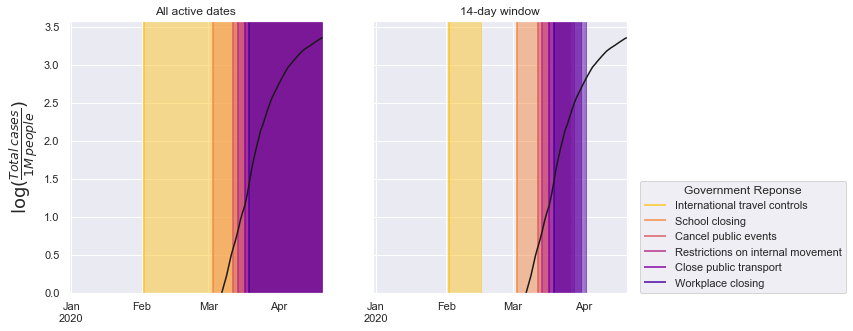

In [46]:
quarantine_plot(data, 'United States', response_df, applyfunc=np.log10)

In [47]:
response_df.loc['South Korea']

School_closing_start                      2020-02-03
School_closing_end                        2020-04-23
Workplace_closing_start                   2020-02-24
Workplace_closing_end                     2020-04-23
Cancel_public_events_start                2020-01-31
Cancel_public_events_end                  2020-04-23
Close_public_transport_start                     NaT
Close_public_transport_end                       NaT
Restrictions_on_internal_movement_start   2020-02-23
Restrictions_on_internal_movement_end     2020-04-23
International_travel_controls_start       2020-02-03
International_travel_controls_end         2020-04-23
Name: South Korea, dtype: datetime64[ns]

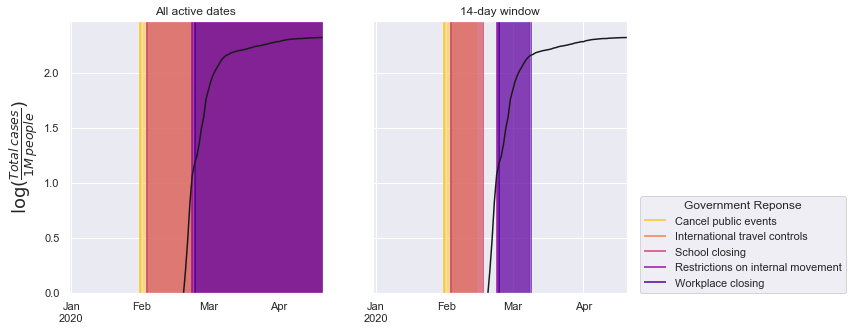

In [48]:
quarantine_plot(data, 'South Korea', response_df, applyfunc=np.log10)

Figure \ref{fig:SKrate} demonstrates a time series of total cases for South Korea. The widths
of the colored regions represent different quantities; on the left it demonstrates the total amount
of time certain measures have been in effect while on the right it only shows a 14-day window
after the implementation of each measure. These 14-day windows attempt to account for the time-delayed effect resulting from incubation time.
The claim that we are pushing is that the rate of change increased until 14 days after the strictest level of quarantine measures were introduced, implying that only then were the measures sufficient.
This behavior is incorporated directly into the analysis. For every quarantine measure, 14 day windows of the time series are taken prior and after each implementation date. The average of the total cases per capita is taken on these windows which results in a triplet of past, present, and future cases per capita values. By assuming exponential growth,
the growth rate before the quarantine measure and after as well as their difference are calculated using
\begin{align}
\rho_{i} &= \frac{1}{\Delta t_{mi}}\log(\frac{\phi_m}{\bar{\phi}_i})\nonumber \\
\rho_{f} &= \frac{1}{\Delta t_{fm}}\log(\frac{\bar{\phi}_{f}}{\phi_m})\nonumber \\
\rho &= \rho_{f}-\rho_{i} \,,
\label{eq:avgrates}
\end{align}
where over-bars denote averages over each window.
By iterating over the countries and government responses, equation (\ref{eq:avgrates}) produces a table of observations on which two-way ANOVA can be applied. Specifically,
the blocks were taken to be the different quarantine measures and the treatments were taken to be the countries. The confidence level is chosen to be 95\% and the corresponding hypothesis set can be written as
\begin{align}
    H_0 &: \mu_0 = \mu_1 = ... = \mu_a \nonumber\\
    H_1 &: \text{any of the means is different} \nonumber
\end{align}

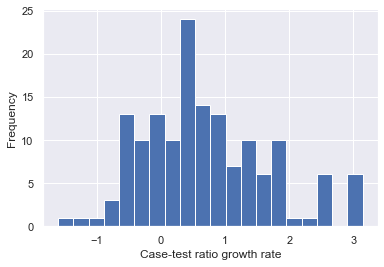

KstestResult(statistic=0.27220399686187235, pvalue=2.606614433940497e-10)


In [49]:
from scipy.stats import kstest

_ = plt.hist(before_minus_after.values.ravel(),bins=20)
_ = plt.xlabel('Case-test ratio growth rate')
_ = plt.ylabel('Frequency')
_ =  plt.savefig('mg2.jpg',bbox_inches='tight', pad_inches=0)
_ = plt.show()
print(kstest(before_minus_after.values.ravel(), cdf='norm'))

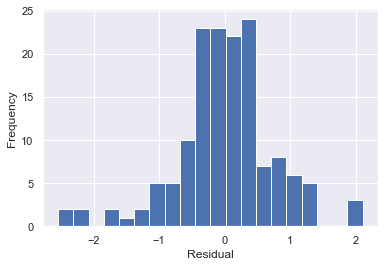

KstestResult(statistic=0.14122471071966755, pvalue=0.0045044568807878094)

In [50]:
_ = plt.hist(before_minus_after_residual_df.values.ravel(), bins=20)
_ = plt.xlabel('Residual')
_ = plt.ylabel('Frequency')
plt.savefig('mg3.jpg',bbox_inches='tight', pad_inches=0)
_ = plt.show()
kstest(before_minus_after_residual_df.values.ravel(), cdf='norm')

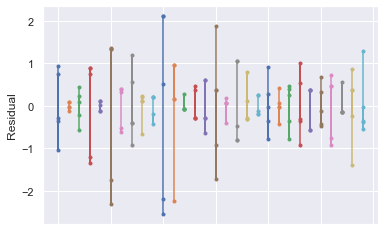

In [51]:
fig, ax = plt.subplots()
for i, x in enumerate(before_minus_after_residual_df.values):
    ax.plot(5*[i], x, marker='.', label=before_minus_after_residual_df.index[i])
    
_ = ax.set_ylabel('Residual')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.savefig('mg4.jpg',bbox_inches='tight', pad_inches=0)
_ = plt.show()

In [52]:
# for i, x in enumerate(before_minus_after_residual_df.values.transpose()):
#     plt.plot(41*[i], x, marker='.', label=before_minus_after_residual_df.columns[i])
# _ = plt.xticks(None)
# _ = plt.ylabel('Residual')
# plt.tick_params(
#     axis='x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom=False,      # ticks along the bottom edge are off
#     top=False,         # ticks along the top edge are off
#     labelbottom=False)
# _ = plt.legend(loc=(0.1,0.72), title='Blocks', fontsize=6)
# _ = plt.savefig('mg5.jpg',bbox_inches='tight', pad_inches=0)
# _ = plt.show()


Variance comparisons for treatment residuals (left, countries) and block residuals (right, government responses). There are too many countries to label conveniently but the order from left to right
  is equivalent to the lexicographical ordering in the corresponding
  appendix table
  
To validate these results the distribution of the observations and their residuals (Figure \ref{TCHist}) as well as variance comparison plots for countries and government responses are displayed (Figure \ref{TCvarbar}). The residuals and observations are approximately normally distributed and the variances for the blocks seem similar. The main area of concern is the variances of each countries' residuals. These disparate variances affect the interpretation of the ANOVA results; especially the effect that the countries have on the rate change. Additionally, these results may be misleading because the quarantine measures overlap with one another; when combined with the time delayed nature of the problem these results should be viewed skeptically.

In [53]:
sm_df = before_minus_after.unstack().reset_index()
sm_df.columns = ['Type','Country','Change']

import statsmodels.api as sm

formula = 'Change ~ Type + Country'
model = sm.formula.ols(formula, data=sm_df).fit()

# Perform ANOVA and print table
aov_table = sm.stats.anova_lm(model, typ=2)
print(aov_table)

             sum_sq     df         F    PR(>F)
Type       5.632678    4.0  2.053220  0.091472
Country   54.851569   29.0  2.757857  0.000067
Residual  79.556812  116.0       NaN       NaN


In [54]:
data.loc[:, 'cumulative_normalized_case_test_ratio'] = (data.total_cases_interpolated / data.tests_cumulative_interpolated).cumsum()

In [55]:
data.loc['United States', ['population','total_cases_interpolated','tests_cumulative_interpolated','cumulative_normalized_case_test_ratio']]

,population,total_cases_interpolated,tests_cumulative_interpolated,cumulative_normalized_case_test_ratio
Date,,,,
2019-12-31,331003000.0,1.0,4.0,808.583423
2020-01-01,331003000.0,1.0,4.0,808.833423
2020-01-02,331003000.0,1.0,4.0,809.083423
2020-01-03,331003000.0,1.0,4.0,809.333423
2020-01-04,331003000.0,1.0,4.0,809.583423
...,...,...,...,...
2020-04-16,331003000.0,639664.0,3262921.0,819.805236
2020-04-17,331003000.0,671331.0,3423034.0,820.001357
2020-04-18,331003000.0,702164.0,3574392.0,820.197800


The testing data is being used as a reference, so its not necessary to remove the countries which aren't
in the government response data.

Unfortunately there is one more step that needs to be taken, as even though the testing data has data on
some countries, it doesn't contain the actual testing data. Therefore, need to remove countries which do not
have testing data.

Countries where there is actual testing data and case data. 

Only look at the average growth rates after first known case, as to not unfairly decrease the rate before responses.

## Instead of datetime slicing I should have just been using days since first case.

Redo the multiindex slice computation

In [56]:
def multi_index_slice_to_average_rate_original(x, testing_df):
    sliced_values = testing_df.loc[x, :]
    sliced_values_of_interest = sliced_values.loc[:, ['total_cases_per_million', 'total_tests']].replace(to_replace=np.nan, value=1.) 
#     avg_case_rate = (sliced_values_of_interest.iloc[-1, 0]
#                               -sliced_values_of_interest.iloc[0, 0])  / len(sliced_values_of_interest)
    avg_case_rate = (sliced_values_of_interest.iloc[-1, 0]/sliced_values_of_interest.iloc[0, 0])**(-1/len(sliced_values_of_interest))
#         test_weight = (sliced_values_of_interest.iloc[-1, 1]
#                        -sliced_values_of_interest.iloc[0, 1])
#         if (test_weight == 0.) or (test_weight == np.nan):
#             test_weight = 1.
#         weighted_avg_rate = avg_case_rate / test_weight
#         return weighted_avg_rate
    return avg_case_rate

These represent the official dates of government action but these dates may not exist in testing data. Therefore, need to check start dates vs. testing data start dates.

testing data typically starts far after response data. therefore cannot weight by testing and still have representation from majority of countries. In that case, just use the average rate of total cases per million, before and after response dates.

In [57]:
first_response_dates = start_end_df.min(axis=1).sort_index()
first_response_dates.head(10)

Afghanistan   2020-03-01
Albania       2020-02-25
Algeria       2020-03-12
Andorra       2020-03-16
Angola        2020-02-06
Argentina     2020-03-11
Aruba         2020-03-15
Australia     2020-02-01
Austria       2020-03-09
Azerbaijan    2020-01-30
dtype: datetime64[ns]

In [58]:
first_case_dates = test_multiindex_df.reset_index(level=1).groupby(level=0).Date.min().sort_index()
first_case_dates.head(10)

Country
Afghanistan   2020-03-03
Albania       2020-04-05
Angola        2020-03-22
Argentina     2020-03-16
Australia     2020-03-09
Austria       2020-03-02
Azerbaijan    2020-04-01
Bahrain       2020-03-04
Bangladesh    2020-03-18
Barbados      2020-03-29
Name: Date, dtype: datetime64[ns]

In [59]:
dates_with_test_data = test_multiindex_df.tests_cumulative.dropna()
dates_with_test_data.head()

Country      Date      
Afghanistan  2020-03-03    59
             2020-03-04    59
             2020-03-05    81
             2020-03-06    81
             2020-03-07    84
Name: tests_cumulative, dtype: int64

In [60]:
min_testing_dates = test_multiindex_df.tests_cumulative.dropna().reset_index(level=1).groupby(level=0).Date.min()

In [61]:
first_testing_dates = test_multiindex_df.tests_cumulative.dropna().reset_index(level=1).groupby(level=0).Date.min()
last_testing_dates = test_multiindex_df.tests_cumulative.dropna().reset_index(level=1).groupby(level=0).Date.max()

In [62]:
first_testing_dates.reset_index()

,Country,Date
0,Afghanistan,2020-03-03
1,Albania,2020-04-05
2,Angola,2020-03-22
3,Argentina,2020-03-16
4,Australia,2020-03-09
...,...,...
104,Uzbekistan,2020-03-30
105,Venezuela,2020-03-31
106,Vietnam,2020-03-03
107,Zambia,2020-04-01


In [63]:
# convert entire dataframe to index so it can be used to slice testing data, dataframe
first_tmp =  first_testing_dates.reset_index().set_index(['Country','Date'])
last_tmp =  last_testing_dates.reset_index().set_index(['Country','Date'])
first_tmp.head()

,
Country,Date
Afghanistan,2020-03-03
Albania,2020-04-05
Angola,2020-03-22
Argentina,2020-03-16
Australia,2020-03-09


In [64]:
test_min = test_multiindex_df.loc[first_tmp.index, :]
test_max = test_multiindex_df.loc[last_tmp.index, :]

In [65]:
# reset index so we can subtract datetime variables.
test_max_reset = test_max.reset_index(level=1)
test_min_reset = test_min.reset_index(level=1)
time_differential = (test_max_reset.Date - test_min_reset.Date).dt.days
testing_rates = np.log(test_max_reset.tests_cumulative / test_min_reset.tests_cumulative)# / time_intervals

Calculate the extrapolation range by comparing first known case date with first reported test date (obviously
there must to have been tests before this date, they just weren't recorded). More concerned with getting the extrapolation right, so don't worry if it doesn't match where there is actual testing data.

In [66]:
test_final_test_initial_time_intervals = (test_max_reset.Date - test_min_reset.Date).dt.days

In [67]:
case_response_differential = (first_case_dates-first_response_dates).dt.days

In [68]:
late_response = case_response_differential < 0
late_response

Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Uzbekistan     False
Venezuela      False
Vietnam        False
Zambia         False
Zimbabwe       False
Length: 151, dtype: bool

Convert the testing dataframe to the same standard of country names then slice out all countries that are not in
the current pool of names. 

slice the countries to those our reduced set.

In [69]:
global_cases = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_global.csv'
g = pd.read_csv(global_cases)

In [70]:
IHME_data = pd.read_csv('./ihme-covid19/2020_04_12.02/Hospitalization_all_locs.csv')

In [71]:
dir_ =  'C:\\Users\\Matt\\Desktop\\statmethods\\group_project\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format0\\'
file = dir_ + '01-23-2020.csv'

In [72]:
dir0 = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format0\\'
dir1 = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format1\\'
dir2 = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_daily_reports\\format2\\'

In [73]:
for i, f in enumerate(glob.glob(dir0+'*.csv')):
    if i==0:
        csse = pd.read_csv(f)
    else:
        csse = pd.concat((csse, pd.read_csv(f)), axis=0)

In [74]:
csse

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
1,Beijing,Mainland China,1/22/2020 17:00,14.0,NaN,NaN
2,Chongqing,Mainland China,1/22/2020 17:00,6.0,NaN,NaN
3,Fujian,Mainland China,1/22/2020 17:00,1.0,NaN,NaN
4,Gansu,Mainland China,1/22/2020 17:00,NaN,NaN,NaN
...,...,...,...,...,...,...
114,"Tempe, AZ",US,2020-02-25T21:23:03,1.0,0.0,1.0
115,From Diamond Princess,Australia,2020-02-29T02:03:10,0.0,0.0,0.0
116,"Lackland, TX (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0
117,"Omaha, NE (From Diamond Princess)",US,2020-02-24T23:33:02,0.0,0.0,0.0


In [75]:
uc =  '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_US.csv'
ud =  '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_deaths_US.csv'

In [76]:
us_cases = pd.read_csv(uc)
us_deaths = pd.read_csv(ud)
us_deaths['type']='Dead'
us_cases['type']='Confirmed'

In [77]:
us_cases

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,type
0,16.0,AS,ASM,16,60.0,NaN,American Samoa,US,-14.271000,-170.132000,...,0,0,0,0,0,0,0,0,0,Confirmed
1,316.0,GU,GUM,316,66.0,NaN,Guam,US,13.444300,144.793700,...,139,141,141,141,141,141,141,145,145,Confirmed
2,580.0,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.097900,145.673900,...,14,14,14,14,14,14,14,14,14,Confirmed
3,630.0,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.220800,-66.590100,...,1416,1276,1307,1371,1389,1400,1433,1539,1575,Confirmed
4,850.0,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.335800,-64.896300,...,54,54,55,57,57,57,57,66,66,Confirmed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3256,84070016.0,US,USA,840,NaN,Central Utah,Utah,US,39.372319,-111.575868,...,21,21,21,21,22,22,22,23,23,Confirmed
3257,84070017.0,US,USA,840,NaN,Southeast Utah,Utah,US,38.996171,-110.701396,...,7,8,11,12,13,13,14,12,13,Confirmed
3258,84070018.0,US,USA,840,NaN,Southwest Utah,Utah,US,37.854472,-111.441876,...,76,81,83,87,89,91,93,98,101,Confirmed
3259,84070019.0,US,USA,840,NaN,TriCounty,Utah,US,40.124915,-109.517442,...,9,9,9,10,11,11,11,13,13,Confirmed


In [78]:
u = pd.concat((us_deaths, us_cases),axis=0).groupby(['Province_State', 'type']).sum()
u.loc[:, '1/22/20':].head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Province_State type                                                     
Alabama        Confirmed        0        0        0        0        0   
               Dead             0        0        0        0        0   
Alaska         Confirmed        0        0        0        0        0   
               Dead             0        0        0        0        0   
American Samoa Confirmed        0        0        0        0        0   

                          1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  ...  \
Province_State type                                                    ...   
Alabama        Confirmed        0        0        0        0        0  ...   
               Dead             0        0        0        0        0  ...   
Alaska         Confirmed        0        0        0        0        0  ...   
               Dead             0        0        0        0        0  ...   
American Samoa Confirmed        0        0        0        0        0  ...   

                          4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  \
Province_State type                                                     
Alabama        Confirmed     5593     5832     6026     6026     6421   
               Dead           196      202      209      209      219   
Alaska         Confirmed      335      337      339      339      340   
               Dead             9        9        9        9        9   
American Samoa Confirmed        0        0        0        0        0   

                          4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  
Province_State type                                                   
Alabama        Confirmed     6539     6750     6912     7088    7294  
               Dead           228      242      256      272     289  
Alaska         Confirmed      345      351      355      355     364  
               Dead             9        9        9        9       9  
American Samoa Confirmed        0        0        0        0       0  

[5 rows x 101 columns]

In [79]:
since_first_case_normalized_u = u.replace(to_replace=[0,0.], value=np.nan)

In [80]:
states_to_inspect = ['Michigan', 'Georgia', 'New York', 'Texas']

In [81]:
dead=us_deaths[us_deaths['Province_State'].isin(states_to_inspect)].groupby(by='Province_State').sum()
confirmed=us_cases[us_cases['Province_State'].isin(states_to_inspect)].groupby(by='Province_State').sum()
confirmed.head()

,UID,code3,FIPS,Lat,Long_,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Georgia,1.352626e+10,135240,2262703.0,5216.556611,-13288.811358,0,0,0,0,0,...,21214,21883,22491,23222,23486,24302,24922,25775,26264,27489
Michigan,7.310475e+09,73080,2334941.0,3655.620467,-7070.080729,0,0,0,0,0,...,33966,35296,36666,37074,37778,38210,39262,40399,41379,42356
New York,5.378406e+09,53760,2405916.0,2637.737383,-4679.399365,0,0,0,0,0,...,258222,263460,271590,282143,288045,291996,295106,299691,304372,308314
Texas,2.151643e+10,215040,12426612.0,8041.803434,-25057.879425,0,0,0,0,0,...,21321,22650,23642,24153,24967,25321,26357,27257,28727,29692


In [82]:
since_first_case_normalized_u.loc[(states_to_inspect,'Confirmed'), :].iloc[:,6:].values

array([[        nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan,         nan,         nan,         nan,         nan,
                nan, 2.00000e+00, 2.00000e+00, 2.00000e+00, 3.00000e+00,
        5.00000e+00, 5.00000e+00, 1.00000e+01, 1.70000e+01, 2.30000e+01,
        3.10000e+01, 4.20000e+01, 7.30000e+01, 9.90000e+01, 1.21000e+02,
        1.46000e+02, 1.97000e+02, 2.87000e+02, 4.85000e+02, 5.55000e+02,
        6.21000e+02, 7.72000e+02, 1.02600e+03, 1.24700e+03, 1.52500e+03,
        2.00000e+03, 2.36600e+03, 2.65100e+03, 2.80

In [83]:
since_first_case_normalized_u.loc[(states_to_inspect,'Confirmed'), :].iloc[:,6:] / since_first_case_normalized_u.loc[(states_to_inspect,'Dead'), :].iloc[:,6:]

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  \
Province_State type                                                     
Georgia        Confirmed      NaN      NaN      NaN      NaN      NaN   
               Dead           NaN      NaN      NaN      NaN      NaN   
Michigan       Confirmed      NaN      NaN      NaN      NaN      NaN   
               Dead           NaN      NaN      NaN      NaN      NaN   
New York       Confirmed      NaN      NaN      NaN      NaN      NaN   
               Dead           NaN      NaN      NaN      NaN      NaN   
Texas          Confirmed      NaN      NaN      NaN      NaN      NaN   
               Dead           NaN      NaN      NaN      NaN      NaN   

                          1/27/20  1/28/20  1/29/20  1/30/20  1/31/20  ...  \
Province_State type                                                    ...   
Georgia        Confirmed      NaN      NaN      NaN      NaN      NaN  ...   
               Dead           NaN      NaN      NaN      NaN      NaN  ...   
Michigan       Confirmed      NaN      NaN      NaN      NaN      NaN  ...   
               Dead           NaN      NaN      NaN      NaN      NaN  ...   
New York       Confirmed      NaN      NaN      NaN      NaN      NaN  ...   
               Dead           NaN      NaN      NaN      NaN      NaN  ...   
Texas          Confirmed      NaN      NaN      NaN      NaN      NaN  ...   
               Dead           NaN      NaN      NaN      NaN      NaN  ...   

                          4/22/20  4/23/20  4/24/20  4/25/20  4/26/20  \
Province_State type                                                     
Georgia        Confirmed      NaN      NaN      NaN      NaN      NaN   
               Dead           NaN      NaN      NaN      NaN      NaN   
Michigan       Confirmed      NaN      NaN      NaN      NaN      NaN   
               Dead           NaN      NaN      NaN      NaN      NaN   
New York       Confirmed      NaN      NaN      NaN      NaN      NaN   
               Dead           NaN      NaN      NaN      NaN      NaN   
Texas          Confirmed      NaN      NaN      NaN      NaN      NaN   
               Dead           NaN      NaN      NaN      NaN      NaN   

                          4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  
Province_State type                                                   
Georgia        Confirmed      NaN      NaN      NaN      NaN     NaN  
               Dead           NaN      NaN      NaN      NaN     NaN  
Michigan       Confirmed      NaN      NaN      NaN      NaN     NaN  
               Dead           NaN      NaN      NaN      NaN     NaN  
New York       Confirmed      NaN      NaN      NaN      NaN     NaN  
               Dead           NaN      NaN      NaN      NaN     NaN  
Texas          Confirmed      NaN      NaN      NaN      NaN     NaN  
               Dead           NaN      NaN      NaN      NaN     NaN  

[8 rows x 101 columns]

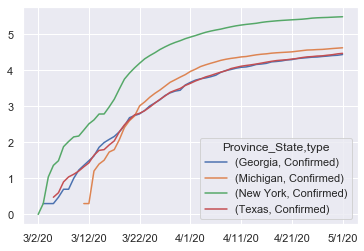

In [84]:
since_first_case_normalized_u.loc[(states_to_inspect,'Confirmed'), :].iloc[:,6:].apply(np.log10).transpose().plot()

In [85]:
time_series_df = since_first_case_normalized_u#.iloc[:, 6:]
time_series_df

UID  code3       FIPS          Lat  \
Province_State type                                                     
Alabama        Confirmed  5.796241e+09  57960   241491.0  2203.246784   
               Dead       5.796241e+09  57960   241491.0  2203.246784   
Alaska         Confirmed  2.604232e+09  26040   232344.0  1747.579877   
               Dead       2.604232e+09  26040   232344.0  1747.579877   
American Samoa Confirmed  1.600000e+01     16       60.0   -14.271000   
...                                ...    ...        ...          ...   
West Virginia  Dead       4.791143e+09  47880  3143133.0  2134.783954   
Wisconsin      Confirmed  6.220135e+09  62160  4135229.0  3196.450332   
               Dead       6.220135e+09  62160  4135229.0  3196.450332   
Wyoming        Confirmed  2.101459e+09  21000  1458641.0   990.998367   
               Dead       2.101459e+09  21000  1458641.0   990.998367   

                                Long_  Population  1/22/20  1/23/20  1/24/20  \
Province_State type                                                            
Alabama        Confirmed -5809.578199         NaN      NaN      NaN      NaN   
               Dead      -5809.578199   4903185.0      NaN      NaN      NaN   
Alaska         Confirmed -4229.319334         NaN      NaN      NaN      NaN   
               Dead      -4229.319334    731545.0      NaN      NaN      NaN   
American Samoa Confirmed  -170.132000         NaN      NaN      NaN      NaN   
...                               ...         ...      ...      ...      ...   
West Virginia  Dead      -4433.959998   1792147.0      NaN      NaN      NaN   
Wisconsin      Confirmed -6465.454559         NaN      NaN      NaN      NaN   
               Dead      -6465.454559   5822434.0      NaN      NaN      NaN   
Wyoming        Confirmed -2464.524571         NaN      NaN      NaN      NaN   
               Dead      -2464.524571    578759.0      NaN      NaN      NaN   

                          1/25/20  ...  4/22/20  4/23/20  4/24/20  4/25/20  \
Province_State type                ...                                       
Alabama        Confirmed      NaN  ...   5593.0   5832.0   6026.0   6026.0   
               Dead           NaN  ...    196.0    202.0    209.0    209.0   
Alaska         Confirmed      NaN  ...    335.0    337.0    339.0    339.0   
               Dead           NaN  ...      9.0      9.0      9.0      9.0   
American Samoa Confirmed      NaN  ...      NaN      NaN      NaN      NaN   
...                           ...  ...      ...      ...      ...      ...   
West Virginia  Dead           NaN  ...     27.0     31.0     32.0     32.0   
Wisconsin      Confirmed      NaN  ...   4845.0   5052.0   5356.0   5687.0   
               Dead           NaN  ...    248.0    258.0    263.0    266.0   
Wyoming        Confirmed      NaN  ...    447.0    453.0    473.0    491.0   
               Dead           NaN  ...      6.0      7.0      7.0      7.0   

                          4/26/20  4/27/20  4/28/20  4/29/20  4/30/20  5/1/20  
Province_State type                                                            
Alabama        Confirmed   6421.0   6539.0   6750.0   6912.0   7088.0  7294.0  
               Dead         219.0    228.0    242.0    256.0    272.0   289.0  
Alaska         Confirmed    340.0    345.0    351.0    355.0    355.0   364.0  
               Dead           9.0      9.0      9.0      9.0      9.0     9.0  
American Samoa Confirmed      NaN      NaN      NaN      NaN      NaN     NaN  
...                           ...      ...      ...      ...      ...     ...  
West Virginia  Dead          34.0     34.0     38.0     38.0     41.0    46.0  
Wisconsin      Confirmed   5912.0   6081.0   6289.0   6520.0   6854.0  7314.0  
               Dead         272.0    281.0    300.0    308.0    316.0   327.0  
Wyoming        Confirmed    502.0    520.0    536.0    545.0    559.0   566.0  
               Dead           7.0      7.0      7.0      7.0      7.0

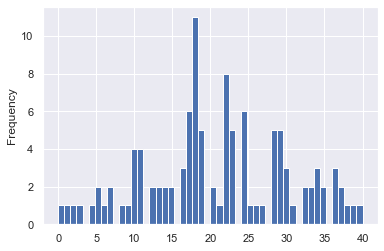

In [86]:
first_case_dates.astype('category').cat.codes.plot.hist(bins=50)

In [87]:
death_rate_df = since_first_case_normalized_u.loc[(states_to_inspect,'Dead'), :].iloc[:,6:].copy()

In [88]:
death_rate_normalized = 100 * since_first_case_normalized_u.loc[(states_to_inspect,'Dead'), :].iloc[:,6:].values / since_first_case_normalized_u.loc[(states_to_inspect,'Confirmed'), :].iloc[:,6:].values

In [89]:
death_rate_df.loc[:, :] = death_rate_normalized

<Figure size 2000x2000 with 0 Axes>

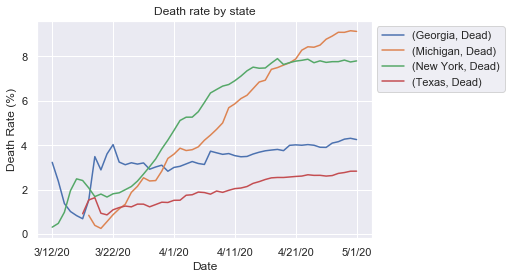

In [90]:
fig = plt.figure(figsize=(10,10), dpi=200)
death_rate_df.transpose().plot().legend(bbox_to_anchor=(1, 1))
_ = plt.xlabel('Date')
_ = plt.ylabel('Death Rate (%)')
plt.grid(True, axis='both')
plt.title('Death rate by state')
plt.savefig('death_rate_NY_MI_GA.png', bbox_inches='tight')

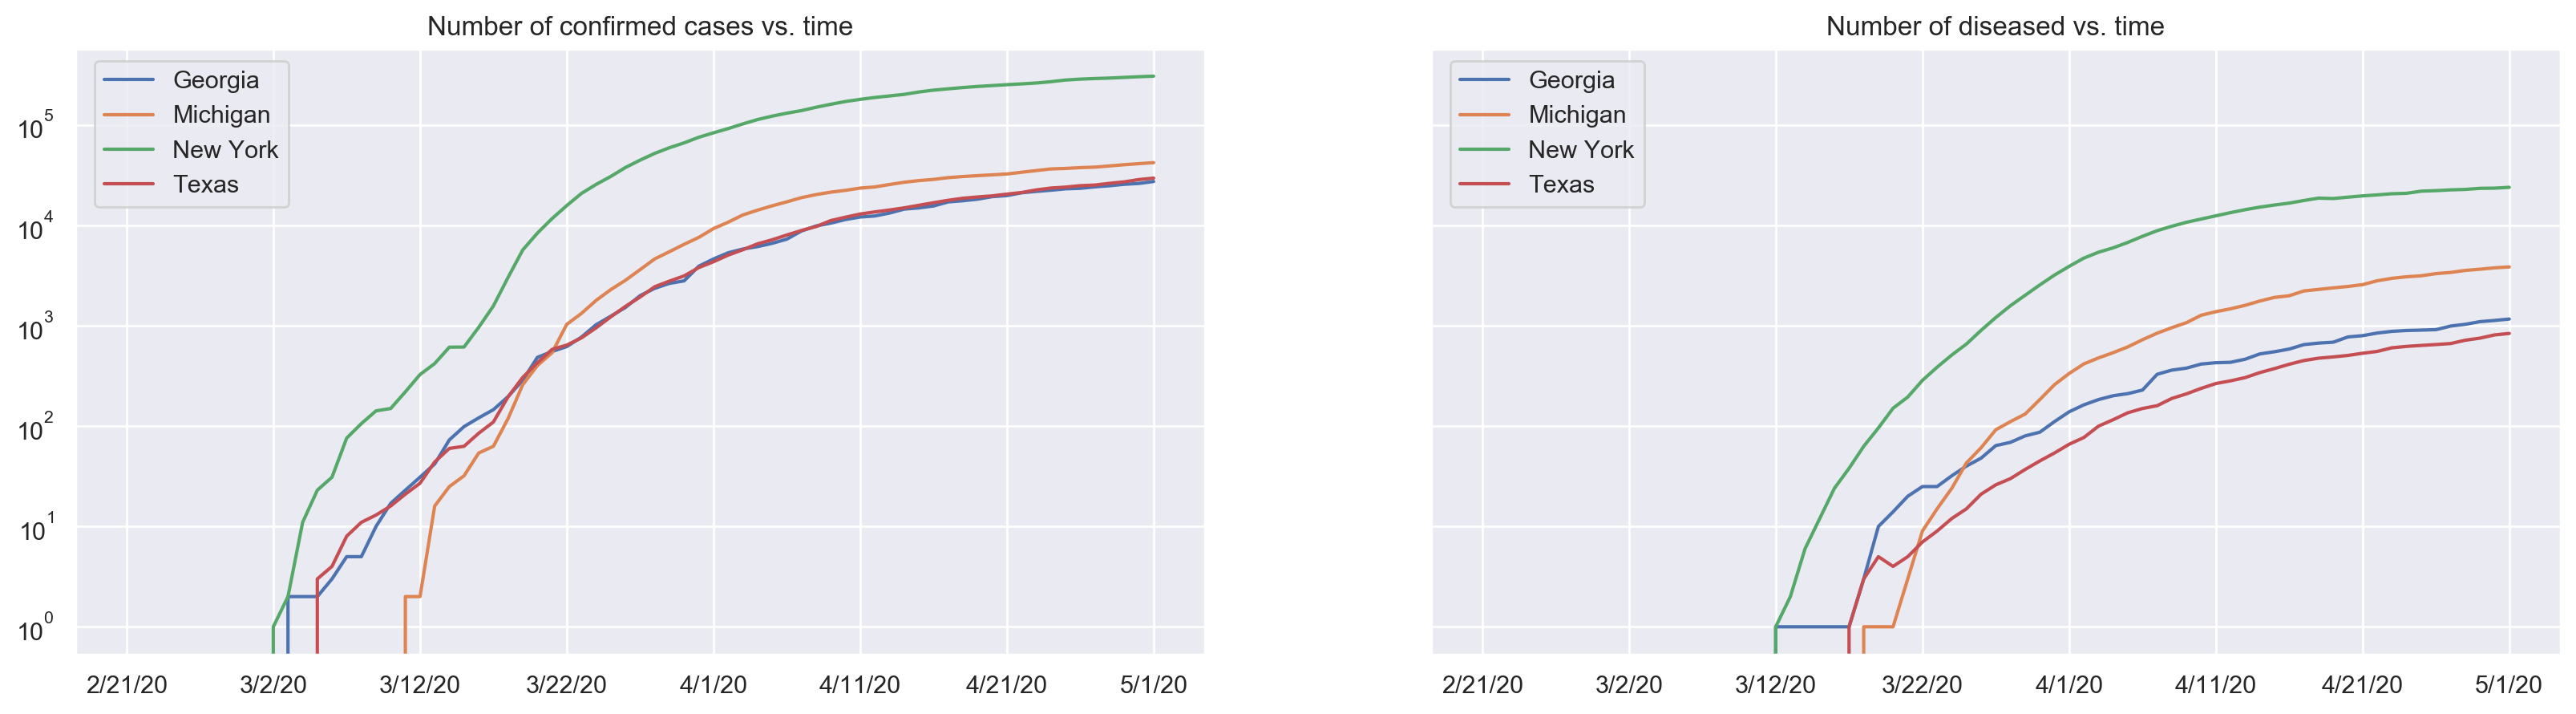

In [91]:
fig, (ax,ax2) = plt.subplots(1, 2, sharey=True,  figsize=(20,5), dpi=200)
confirmed.loc[:, '2/21/20':].transpose().plot(ax=ax).legend(bbox_to_anchor=(0.2, 1))
dead.loc[:, '2/21/20':].transpose().plot(ax=ax2).legend(bbox_to_anchor=(0.2, 1))
ax.set_yscale('log')
ax2.set_yscale('log')
ax.set_title('Number of confirmed cases vs. time')
ax2.set_title('Number of diseased vs. time')
ax.grid(True, axis='both')
ax2.grid(True, axis='both')
plt.savefig('cases_vs_dead_comparison_GA_NY_MI.png', bbox_inches='tight')

In [92]:
testdat = pd.read_csv('./COVID_testing/full-list-cumulative-total-tests-per-million.csv')
testdat

,Entity,Code,Date,Cumulative total tests per million
0,Australia - units unclear,NaN,"Mar 22, 2020",5632.530240
1,Australia - units unclear,NaN,"Mar 29, 2020",8317.959198
2,Australia - units unclear,NaN,"Apr 2, 2020",10276.328100
3,Austria - units unclear,NaN,"Feb 25, 2020",24.822909
4,Austria - units unclear,NaN,"Feb 26, 2020",36.551164
...,...,...,...,...
562,United States - specimens tested (CDC),NaN,"Mar 21, 2020",317.791125
563,United States - specimens tested (CDC),NaN,"Mar 22, 2020",332.101773
564,United States - specimens tested (CDC),NaN,"Mar 23, 2020",358.224815
565,United States - specimens tested (CDC),NaN,"Mar 24, 2020",383.656915


In [93]:
def top_5_counties(state_df, state_name):
    state = state_df[(state_df.Province_State==state_name)]
    state = state.drop(columns=['UID','iso2','iso3','code3','FIPS','Country_Region','Lat','Long_','Combined_Key','Province_State'])
    top5_counties = state.groupby(by='Admin2').sum().sum(axis=1).sort_values(ascending=False)[:5].index.tolist()
    state_info = state[state.Admin2.isin(top5_counties)].set_index('Admin2').transpose()
    state_info.columns.name = 'County'
    return state_info

In [94]:
gc = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_confirmed_global.csv'
gd = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_deaths_global.csv'
gr = '.\\COVID-19\\csse_covid_19_data\\csse_covid_19_time_series\\time_series_covid19_recovered_global.csv'

In [95]:
global_confirmed = pd.read_csv(gc)
global_dead = pd.read_csv(gd)
global_recovered = pd.read_csv(gr)

In [96]:
global_recovered_dates_only = global_recovered.set_index('Country/Region').loc[:, '1/22/20':].groupby(level=0).sum()
global_confirmed_dates_only = global_confirmed.set_index('Country/Region').loc[:, '1/22/20':].groupby(level=0).sum()
global_dead_dates_only = global_dead.set_index('Country/Region').loc[:, '1/22/20':].groupby(level=0).sum()

In [97]:
global_dead['type']='Dead'
global_confirmed['type']='Confirmed'
global_recovered['type']='Recovered'

In [98]:
dead=global_dead[global_dead['Country/Region'].isin(['Germany', 'Italy', 'US'])].set_index('Country/Region').loc[:,'1/22/20':]#.iloc[:, 4:].transpose().columns
confirmed=global_confirmed[global_confirmed['Country/Region'].isin(['Germany', 'Italy', 'US'])].set_index('Country/Region').loc[:,'1/22/20':]#.iloc[:, 4:].transpose().columns

In [100]:
global_dead = global_dead.sort_index(axis=1)
global_confirmed = global_confirmed.sort_index(axis=1)
global_recovered = global_recovered.sort_index(axis=1)

In [101]:
skr = global_confirmed.groupby('Country/Region').sum().iloc[143, :].loc['1/22/20':'4/28/20']
skr.head()

1/22/20    0.0
1/23/20    0.0
1/24/20    0.0
1/25/20    0.0
1/26/20    0.0
Name: Saint Vincent and the Grenadines, dtype: float64

In [102]:
top10 = global_confirmed.groupby('Country/Region').sum().loc[:, '1/22/20':'4/28/20'].sort_values(by='4/28/20').iloc[-10:, :]
skr = global_confirmed.groupby('Country/Region').sum().loc['Korea, South', '1/22/20':'4/28/20']

In [103]:
top10_and_south_korea = pd.concat((top10, skr.to_frame(name='South Korea').transpose()),axis=0).sort_index()

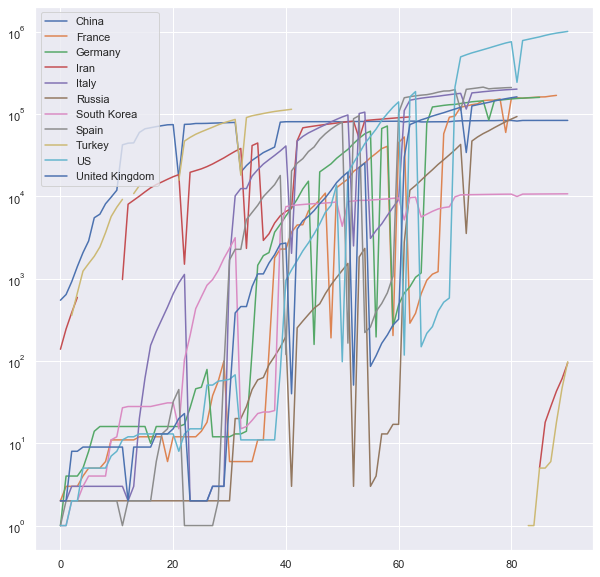

In [104]:
fig, ax = plt.subplots(figsize=(10,10))
for i, country_time_series in enumerate(top10_and_south_korea.replace(to_replace=[0,0.], value=np.nan).values):
    nan_count = np.sum(np.isnan(country_time_series))
    days_since_first = np.roll(country_time_series, -nan_count)
    plt.plot(days_since_first, label=top10_and_south_korea.index[i])
    
plt.legend()
plt.yscale('log')
plt.show()

In [105]:
global_dead_dates_only

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,40,42,43,47,50,57,58,60,64,68
Albania,0,0,0,0,0,0,0,0,0,0,...,27,27,27,27,28,28,30,30,31,31
Algeria,0,0,0,0,0,0,0,0,0,0,...,402,407,415,419,425,432,437,444,450,453
Andorra,0,0,0,0,0,0,0,0,0,0,...,37,37,40,40,40,40,41,42,42,43
Angola,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,4,4,4,2,2,2,2,2,2,2
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2


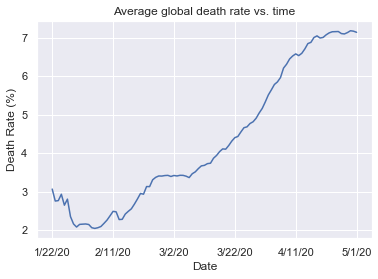

In [106]:
dsum = global_dead_dates_only.sum()
csum = global_confirmed_dates_only.sum()
drsum = 100*dsum/csum
drsum.plot()
_ = plt.xlabel('Date')
_ = plt.ylabel('Death Rate (%)')
_ = plt.title('Average global death rate vs. time')
plt.grid(True, axis='both')
plt.savefig('death_rate_global.png', bbox_inches='tight')

In [107]:
lasttwodays = u.loc[u.index[u.index.get_level_values(level=1)=='Confirmed'],'4/30/20':]

In [108]:
(lasttwodays.iloc[:, -1] - lasttwodays.iloc[:, -2]).sort_values(ascending=False)

Province_State            type     
New York                  Confirmed    3942
Illinois                  Confirmed    3137
New Jersey                Confirmed    2538
Massachusetts             Confirmed    2106
California                Confirmed    1896
Maryland                  Confirmed    1730
Pennsylvania              Confirmed    1608
Georgia                   Confirmed    1225
Tennessee                 Confirmed    1156
Connecticut               Confirmed    1064
Virginia                  Confirmed    1055
Florida                   Confirmed    1038
Michigan                  Confirmed     977
Texas                     Confirmed     965
Indiana                   Confirmed     795
Iowa                      Confirmed     739
Nebraska                  Confirmed     727
Ohio                      Confirmed     716
Louisiana                 Confirmed     710
Minnesota                 Confirmed     594
Colorado                  Confirmed     509
Wisconsin                 Confirmed     

In [109]:
u.loc['Confirmed', '1/22/20':]#.iloc[-1]-u.loc[('Georgia', 'Confirmed'), '1/22/20':].iloc[-2]#.plot()

KeyError: 'Confirmed'